In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | caravelas
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bowen
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | carbonia
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | rio gallegos
Processing Record 15 of Set 1 | derzhavinsk
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | senador jose porfirio
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | beyneu
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | tommot
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | kijang
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | charters towers
Processing Record 42 of Set 4 | norwalk
Processing Record 43 of Set 4 | requena
Processing Record 44 of Set 4 | mana
Processing Record 45 of Set 4 | norrtalje
Processing Record 46 of Set 4 | inuvik
Processing Record 47 of Set 4 | barbar
City not found. Skipping...
Processing Record 48 of Set 4 | susuman
Processing Record 49 of Set 4 | coro
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | chadiza
Processing Record 2 of Set 5 | lasa
Processing Record 3 of Set 5 | khuzhir
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | zambrow
Processing Record 7 of Set 5 | markova
Processing Record 8 of Set 5 | nemuro
Processing Record 9 of Set 5 | carutapera
Processing Record 

Processing Record 27 of Set 8 | sulangan
Processing Record 28 of Set 8 | bonavista
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | roma
Processing Record 31 of Set 8 | bethel
Processing Record 32 of Set 8 | chuy
Processing Record 33 of Set 8 | batagay-alyta
Processing Record 34 of Set 8 | padrauna
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | millinocket
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | belaya gora
Processing Record 39 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 40 of Set 8 | kyabe
Processing Record 41 of Set 8 | trindade
Processing Record 42 of Set 8 | albemarle
Processing Record 43 of Set 8 | brownsville
Processing Record 44 of Set 8 | el fuerte
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | volovo
Processing Record 48 of Set 8 | port hardy
Processing Record 49 of Set

Processing Record 15 of Set 12 | la palma
Processing Record 16 of Set 12 | port shepstone
Processing Record 17 of Set 12 | kalemie
Processing Record 18 of Set 12 | bushehr
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | nyurba
Processing Record 21 of Set 12 | jiroft
City not found. Skipping...
Processing Record 22 of Set 12 | coihaique
Processing Record 23 of Set 12 | lashio
Processing Record 24 of Set 12 | muhos
Processing Record 25 of Set 12 | luderitz
Processing Record 26 of Set 12 | saleaula
City not found. Skipping...
Processing Record 27 of Set 12 | molteno
Processing Record 28 of Set 12 | shangzhi
Processing Record 29 of Set 12 | alirajpur
Processing Record 30 of Set 12 | kurud
Processing Record 31 of Set 12 | presidencia roque saenz pena
Processing Record 32 of Set 12 | bosaso
Processing Record 33 of Set 12 | tezu
Processing Record 34 of Set 12 | santa ines
Processing Record 35 of Set 12 | erzin
Processing Record 36 of Set 12 

In [11]:
print(len(cities))

624


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.98,84,100,15.57,PF,2021-12-22 00:30:01
1,Egvekinot,66.3167,-179.1667,-13.59,77,100,7.16,RU,2021-12-22 00:30:01
2,Mar Del Plata,-38.0023,-57.5575,71.10,93,0,3.00,AR,2021-12-22 00:29:11
3,Caravelas,-17.7125,-39.2481,73.26,93,28,4.52,BR,2021-12-22 00:30:02
4,Yellowknife,62.4560,-114.3525,-19.68,69,90,5.75,CA,2021-12-22 00:30:02
5,Kaitangata,-46.2817,169.8464,69.93,45,26,9.55,NZ,2021-12-22 00:30:03
6,Jamestown,42.0970,-79.2353,36.99,73,1,3.00,US,2021-12-22 00:30:04
7,Bowen,-20.0167,148.2333,86.22,62,5,10.98,AU,2021-12-22 00:30:04
8,Mataura,-46.1927,168.8643,67.48,43,83,11.50,NZ,2021-12-22 00:30:05
9,Carbonia,39.1672,8.5222,50.99,82,94,3.13,IT,2021-12-22 00:30:06


In [13]:
column_order = ['City', 'Country', 'Date', "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-12-22 00:30:01,-23.1203,-134.9692,74.98,84,100,15.57
1,Egvekinot,RU,2021-12-22 00:30:01,66.3167,-179.1667,-13.59,77,100,7.16
2,Mar Del Plata,AR,2021-12-22 00:29:11,-38.0023,-57.5575,71.10,93,0,3.00
3,Caravelas,BR,2021-12-22 00:30:02,-17.7125,-39.2481,73.26,93,28,4.52
4,Yellowknife,CA,2021-12-22 00:30:02,62.4560,-114.3525,-19.68,69,90,5.75
5,Kaitangata,NZ,2021-12-22 00:30:03,-46.2817,169.8464,69.93,45,26,9.55
6,Jamestown,US,2021-12-22 00:30:04,42.0970,-79.2353,36.99,73,1,3.00
7,Bowen,AU,2021-12-22 00:30:04,-20.0167,148.2333,86.22,62,5,10.98
8,Mataura,NZ,2021-12-22 00:30:05,-46.1927,168.8643,67.48,43,83,11.50
9,Carbonia,IT,2021-12-22 00:30:06,39.1672,8.5222,50.99,82,94,3.13


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

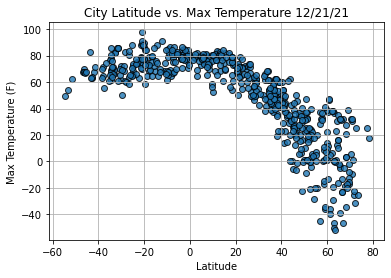

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

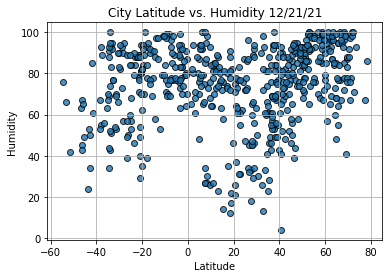

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

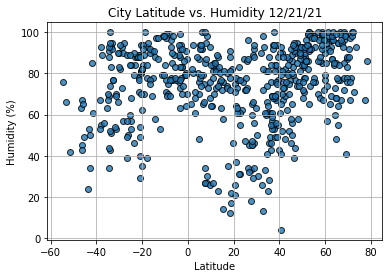

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

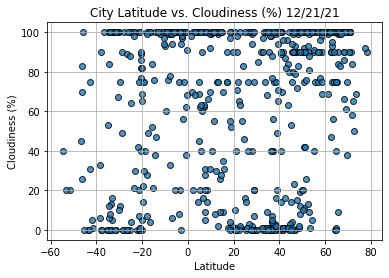

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

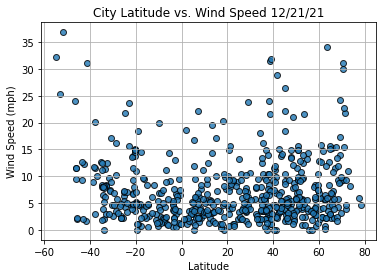

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                  Derzhavinsk
Country                        KZ
Date          2021-12-22 00:30:09
Lat                          51.1
Lng                       66.3167
Max Temp                    32.86
Humidity                       88
Cloudiness                    100
Wind Speed                  14.97
Name: 13, dtype: object

In [24]:
city_data = city_data_df["Lat"] >= 0
city_data

0      False
1       True
2      False
3      False
4       True
       ...  
563    False
564     True
565     True
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Egvekinot,RU,2021-12-22 00:30:01,66.3167,-179.1667,-13.59,77,100,7.16
4,Yellowknife,CA,2021-12-22 00:30:02,62.4560,-114.3525,-19.68,69,90,5.75
6,Jamestown,US,2021-12-22 00:30:04,42.0970,-79.2353,36.99,73,1,3.00
9,Carbonia,IT,2021-12-22 00:30:06,39.1672,8.5222,50.99,82,94,3.13
13,Derzhavinsk,KZ,2021-12-22 00:30:09,51.1000,66.3167,32.86,88,100,14.97
...,...,...,...,...,...,...,...,...,...
560,Tignere,CM,2021-12-22 00:45:42,7.3667,12.6500,65.14,34,5,2.28
562,Brezice,SI,2021-12-22 00:45:43,45.9033,15.5911,36.00,94,90,2.30
564,Basoko,CD,2021-12-22 00:45:44,1.2391,23.6160,76.33,65,98,1.95
565,Raudeberg,NO,2021-12-22 00:45:45,61.9875,5.1352,37.87,91,100,4.00


In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Egvekinot,RU,2021-12-22 00:30:01,66.3167,-179.1667,-13.59,77,100,7.16
4,Yellowknife,CA,2021-12-22 00:30:02,62.4560,-114.3525,-19.68,69,90,5.75
6,Jamestown,US,2021-12-22 00:30:04,42.0970,-79.2353,36.99,73,1,3.00
9,Carbonia,IT,2021-12-22 00:30:06,39.1672,8.5222,50.99,82,94,3.13
13,Derzhavinsk,KZ,2021-12-22 00:30:09,51.1000,66.3167,32.86,88,100,14.97


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [114]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title , y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    plt.show()

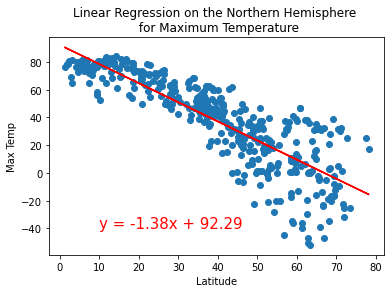

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-40))

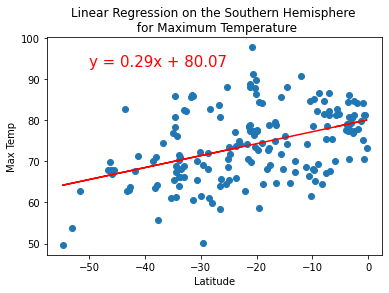

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,93))

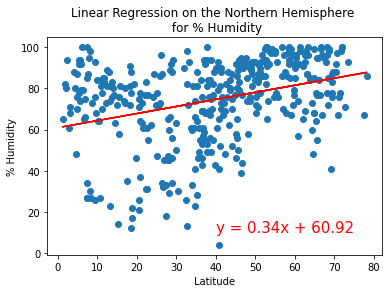

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

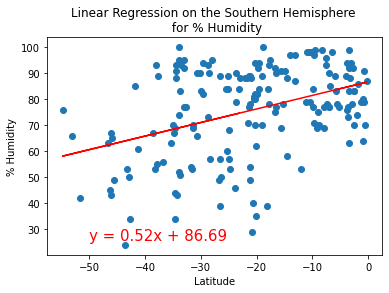

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,26))

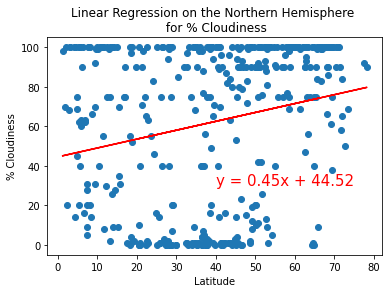

In [119]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,30))

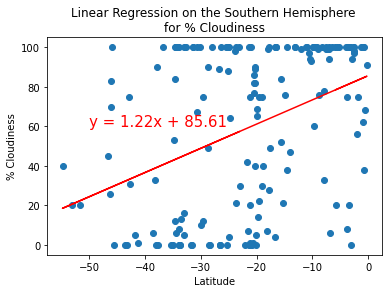

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

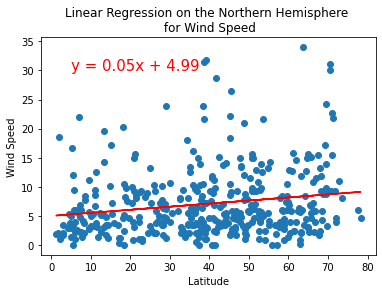

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,30))

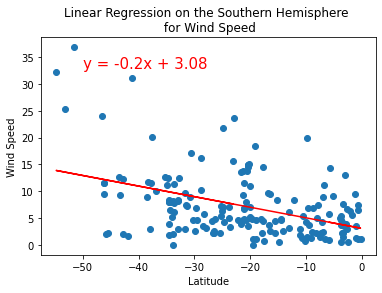

In [122]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,33))